# 1. PREPROCESSING THE DATA

In [2]:
import json
from langdetect import detect

from gensim import corpora, models

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import sys

import numpy as np
import matplotlib.pyplot as plt

----

In [3]:
# Files
TEXT_FILE = 'reviewqr.txt'
OUTPUT_FILE = 'review_sentences.json'

In [4]:
# parses the data
reviews = []
with open(TEXT_FILE, 'rb') as f:
    for line in f:
        data = json.loads(line)
        reviews.append(data)

---- 

### TEXT REVIEWS

- **Removing unneccesary imformation (title, author, date_stayed etc.) and saving ratings (numerical) and text (textual comment/review)**
- **Lowercasing**
- **Removing reviews written in a language other than English** 
- **Removing reviews with incomplete numerical ratings (len(review['rating']<7))**
- **Collecting a list of textual reviews of all the reviews in the dataset**

In [5]:
for review in reviews:
    for key in ('title','author', 'date_stayed', 'offering_id', 'num_helpful_votes', 'date', 'id', 'via_mobile'):
        if key in review:
            del review[key]
    review['text']=review['text'].lower()
    if not detect(review['text'])=='en':
        reviews.remove(review)
    #if len(review['ratings'])!=7:
       # reviews.remove(review)

In [6]:
# collects all the textual reviews in a list of lists with sentences
all_reviews = []
for review in reviews:
    all_reviews.append(re.split(r' *[\.\?!][\'"\)\]]* *', review['text']))

In [7]:
word_tokens = []

for review in all_reviews:
    word_tokens_sentence = []
    for sentence in review:
        word_tokens_sentence.append(word_tokenize(sentence))
    word_tokens.append(word_tokens_sentence)

In [8]:
# Based on some papers we looked at, we manually removed some of the english stopwords which could affect our emotion analysis 
stop_words = set(stopwords.words('english'))-set(('no', 'not', 'didn', 'doesn', 'don', 'down', 'hasn', 'haven'))

filtered_reviews = []
for word_token in word_tokens:
    filtered_reviews_sentence = []
    for word_token_sentence in word_token:
        filtered_reviews_sentence.append([w for w in word_token_sentence if not w in stop_words])
    filtered_reviews.append(filtered_reviews_sentence)

In [9]:
# removes the non-alphabetic characters 
isalpha_filtered_reviews = []
for review in filtered_reviews:
    isalpha_filtered_sentences = []
    for sentence in review:
        isalpha_sentence = []
        for word in sentence:
            #isalpha_review.append(regex.sub('', word))
            if word.isalpha() == True:
                isalpha_sentence.append(word)
        isalpha_filtered_sentences.append(isalpha_sentence)
    isalpha_filtered_reviews.append(isalpha_filtered_sentences)

In [10]:
all_reviews = isalpha_filtered_reviews

In [11]:
# POS-Tagging and Lemmatization
un2wn_mapping = {"VERB" : wn.VERB, "NOUN" : wn.NOUN, "ADJ" : wn.ADJ, "ADV" : wn.ADV}

docs = []

for review in all_reviews:
    lemmatized_reviews = []
    for sentence in review:
        lemmatized_sentence = []
        for w, p in nltk.pos_tag(sentence, tagset="universal"):
            if p in un2wn_mapping.keys():
                lemma = nltk.WordNetLemmatizer().lemmatize(w, pos = un2wn_mapping[p])
            else:
                lemma = nltk.WordNetLemmatizer().lemmatize(w)

            lemmatized_sentence.append(lemma.lower())  # case insensitive
        lemmatized_reviews.append(lemmatized_sentence)
    docs.append(lemmatized_reviews)

In [12]:
with open(OUTPUT_FILE, 'w') as f:
    json.dump(docs, f)

### NUMERICAL RATINGS

- **Collecting a list of numerical ratings of all the reviews in the dataset**
- **Calculating average numerical raitngs for each of the topics (cleanliness, service, rooms, location, overall, sleep_quality, value)**
- **Plotting the average numerical ratings for each of the topics**

In [13]:
all_ratings=[]
for review in reviews:
    all_ratings.append(review['ratings'])

In [14]:
topics=set()
for review in all_ratings:
    for topic,rating in review.items():
        topics.add(topic)
topics=list(topics)

In [15]:
cleanliness_rating=[]
for review in all_ratings:
    for topic, rating in review.items():
        if topic == 'cleanliness':
            cleanliness_rating.append(rating)
cleanliness_rating=sum(cleanliness_rating)/len(cleanliness_rating)

In [16]:
service_rating=[]
for review in all_ratings:
    for topic, rating in review.items():
        if topic == 'service':
            service_rating.append(rating)
service_rating=sum(service_rating)/len(service_rating)

In [17]:
location_rating=[]
for review in all_ratings:
    for topic, rating in review.items():
        if topic == 'location':
            location_rating.append(rating)
location_rating=sum(location_rating)/len(location_rating)

In [18]:
value_rating=[]
for review in all_ratings:
    for topic, rating in review.items():
        if topic == 'value':
            value_rating.append(rating)
value_rating=sum(value_rating)/len(value_rating)

In [19]:
sleep_quality_rating=[]
for review in all_ratings:
    for topic, rating in review.items():
        if topic == 'sleep_quality':
            sleep_quality_rating.append(rating)
sleep_quality_rating=sum(sleep_quality_rating)/len(sleep_quality_rating)

In [20]:
rooms_rating=[]
for review in all_ratings:
    for topic, rating in review.items():
        if topic == 'rooms':
            rooms_rating.append(rating)
rooms_rating=sum(rooms_rating)/len(rooms_rating)

In [21]:
average_ratings=[cleanliness_rating, service_rating, location_rating, value_rating, sleep_quality_rating, rooms_rating]
average_ratings=np.array(average_ratings)
average_ratings=average_ratings/5

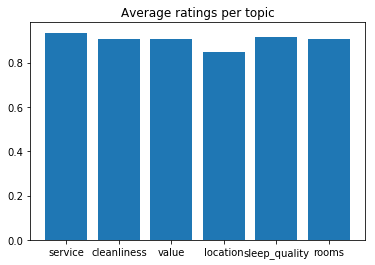

In [25]:
plt.bar(range(len(average_ratings)), average_ratings, align='center')
plt.title("Average ratings per topic")
plt.xticks(np.arange(6), ['service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms'])
plt.show()